# M7
---

## EJERCICIO 1


Crea al menos dos modelos de classificación diferentes para intentar predecir lo mejor posible las clases de los arxivos adjuntos.



Empezamos creando el DataFrame a partir de dos archivos .txt. En uno tenemos los atributos y las clases de los vinos y en el otro los datos correspondientes. Primero extraemos los atributos del archivo wineNames. 

In [1]:
import re

atributos = []

with open('/Users/angel/Desktop/wineNames.txt', 'r') as file:
    lines = file.readlines()

    start_index = lines.index('4. Relevant Information:\n') + 1
    end_index = lines.index('5. Number of Instances\n')

pattern = re.compile(r'\s*\d+\)\s*(\w+.*)')

for line in lines[start_index:end_index]:
    match = pattern.match(line)
    if match:
        attribute_name = match.group(1).strip()  
        atributos.append(attribute_name)

print("Atributos extraídos:")
print(atributos)

Atributos extraídos:
['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


In [2]:
import pandas as pd

atributos = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
             'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
             'OD280/OD315 of diluted wines', 'Proline']

wine_data = pd.read_csv('/Users/angel/Desktop/wineData.txt', header=None, names=atributos)

wine_data

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Una vez creado el DataFrame, paso a buscar duplicados o valores NaN.

In [3]:
wine_data[wine_data.duplicated()]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


In [4]:
wine_data.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

El conjunto de datos no contiene datos duplicados ni valores NaN. Ahora separo la variable objetivo Class del conjunto de datos para poder hacer los procesos de entrenamieto y test de los modelos.

In [5]:
wine_data_x = wine_data.drop("Class", axis=1)  
wine_data_class = wine_data["Class"]               

Ahora divido los datos entre train y test.

In [6]:
from sklearn.model_selection import train_test_split

X = wine_data_x
y = wine_data_class  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamos el conjunto de datos con tres modelos de clasificación distintos:

#### Árbol de decisión

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

#### KNeighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)

y_pred_kn = kn_model.predict(X_test)

#### SVM

In [9]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

## EJERCICIO 2

Compara los modelos de clasificación utilizando la precisión (accuracy), una matriz de confusión y otras métricas más avanzadas.



In [10]:
from sklearn.metrics import confusion_matrix

conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_kn = confusion_matrix(y_test, y_pred_kn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("matriz arbol de decision: \n" , conf_matrix_tree)
print("matriz kn: \n" , conf_matrix_kn)
print("matriz svm: \n" , conf_matrix_svm)

matriz arbol de decision: 
 [[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]
matriz kn: 
 [[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]
matriz svm: 
 [[14  0  0]
 [ 0 11  3]
 [ 0  4  4]]


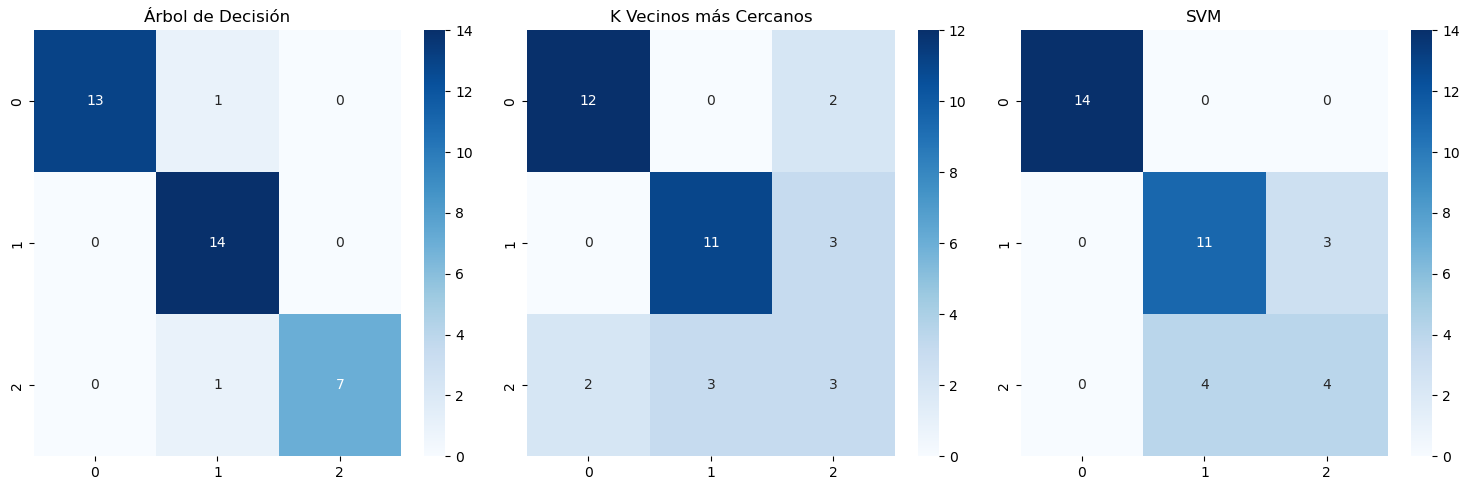

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(conf_matrix_tree, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Árbol de Decisión")

sns.heatmap(conf_matrix_kn, annot=True, cmap="Blues", fmt="d", ax=axes[1])
axes[1].set_title("K Vecinos más Cercanos")

sns.heatmap(conf_matrix_svm, annot=True, cmap="Blues", fmt="d", ax=axes[2])
axes[2].set_title("SVM")

plt.tight_layout();  

En esta matriz comparamos los resultados de los tres modelos. El mejor resultado lo observamos en el árbol de decisión. Ha encontrado 2 errores de clasificación por 34 aciertos. El segundo mejor resultado sería el de SVM mostrando 29 aciertos por 7 errores. Por último, KNeighbors encuentra 26 aciertos por 10 errores. 

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

accuracy_kn = accuracy_score(y_test, y_pred_kn)
f1_kn = f1_score(y_test, y_pred_kn, average='weighted')

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Resultados del modelo de Árbol de Decisión:")
print("Accuracy:", accuracy_tree)
print("F1-score:", f1_tree)
print()

print("Resultados del modelo k-Nearest Neighbors:")
print("Accuracy:", accuracy_kn)
print("F1-score:", f1_kn)
print()

print("Resultados del modelo SVM:")
print("Accuracy:", accuracy_svm)
print("F1-score:", f1_svm)

Resultados del modelo de Árbol de Decisión:
Accuracy: 0.9444444444444444
F1-score: 0.9448559670781894

Resultados del modelo k-Nearest Neighbors:
Accuracy: 0.7222222222222222
F1-score: 0.7222222222222222

Resultados del modelo SVM:
Accuracy: 0.8055555555555556
F1-score: 0.80242656449553


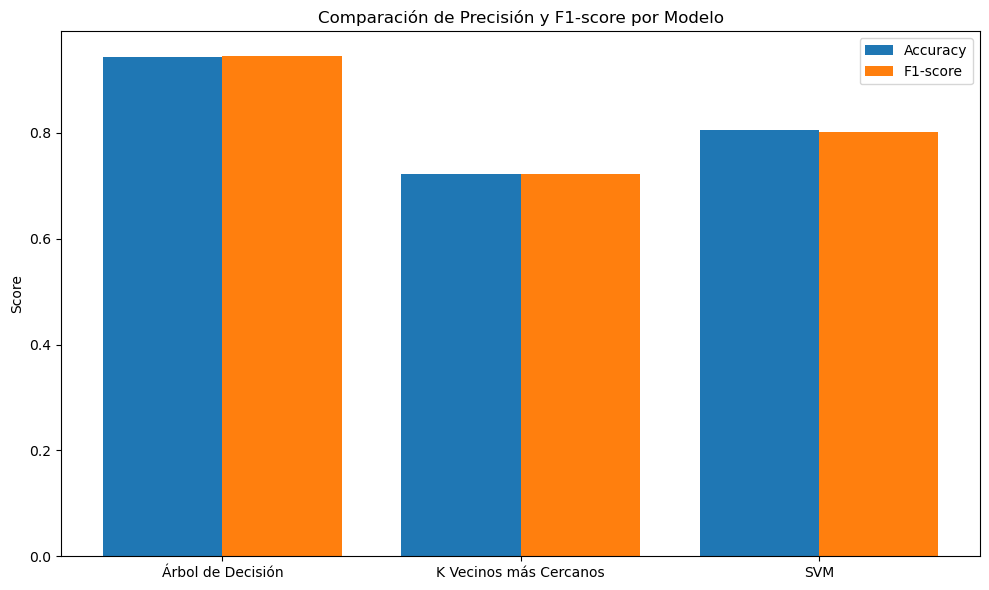

In [13]:
import numpy as np

accuracies = [accuracy_tree, accuracy_kn, accuracy_svm]
f1_scores = [f1_tree, f1_kn, f1_svm]

model_names = ['Árbol de Decisión', 'K Vecinos más Cercanos', 'SVM']

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(len(model_names))-0.2, accuracies, width=0.4, label='Accuracy')

ax.bar(np.arange(len(model_names))+0.2, f1_scores, width=0.4, label='F1-score')

ax.set_xticks(np.arange(len(model_names)))
ax.set_xticklabels(model_names)
ax.set_ylabel('Score')
ax.set_title('Comparación de Precisión y F1-score por Modelo')
ax.legend()

plt.tight_layout();

## EJERCICIO 3
 
Entrénalos usando los diferentes parámetros que admiten para mejorar la predicción.

In [14]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [15]:
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid )

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [16]:
best_tree_model = DecisionTreeClassifier(**grid_search.best_params_)

best_tree_model.fit(X_train, y_train)

y_pred_best_tree = best_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best_tree)
precision = precision_score(y_test, y_pred_best_tree, average = 'macro')
recall = recall_score(y_test, y_pred_best_tree, average = 'macro')
f1 = f1_score(y_test, y_pred_best_tree, average = 'macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8888888888888888
Precision: 0.8882478632478632
Recall: 0.8869047619047619
F1-score: 0.8868135376756067


In [17]:
kn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [30, 40, 50],  
    'p': [1, 2]  
}

grid_search = GridSearchCV(estimator=kn_model, param_grid=param_grid)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [18]:
best_kn_model = KNeighborsClassifier(**grid_search.best_params_)

best_kn_model.fit(X_train, y_train)

y_pred_best_kn = best_kn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best_kn)
precision = precision_score(y_test, y_pred_best_kn, average = 'macro')
recall = recall_score(y_test, y_pred_best_kn, average = 'macro')
f1 = f1_score(y_test, y_pred_best_kn, average = 'macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8055555555555556
Precision: 0.7950660450660451
Recall: 0.7976190476190476
F1-score: 0.7888738941370521


In [19]:
svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid )

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [20]:
best_svm_model = SVC(**grid_search.best_params_)

best_svm_model.fit(X_train, y_train)

y_pred_best_svm = best_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best_svm)
precision = precision_score(y_test, y_pred_best_svm, average = 'macro')
recall = recall_score(y_test, y_pred_best_svm, average = 'macro')
f1 = f1_score(y_test, y_pred_best_svm, average = 'macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


## EJERCICIO 4

Compara su rendimiento usando la aproximación traint/test o cross-validation.

#### TRAIN/TEST

In [21]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='macro')
recall_tree = recall_score(y_test, y_pred_tree, average='macro')
f1_tree = f1_score(y_test, y_pred_tree, average='macro')

print("Decision Tree:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1-score:", f1_tree)

accuracy_kn = accuracy_score(y_test, y_pred_kn)
precision_kn = precision_score(y_test, y_pred_kn, average='macro')
recall_kn = recall_score(y_test, y_pred_kn, average='macro')
f1_kn = f1_score(y_test, y_pred_kn, average='macro')

print("\nK Nearest Neighbors:")
print("Accuracy:", accuracy_kn)
print("Precision:", precision_kn)
print("Recall:", recall_kn)
print("F1-score:", f1_kn)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)

Decision Tree:
Accuracy: 0.9444444444444444
Precision: 0.9583333333333334
Recall: 0.9345238095238096
F1-score: 0.94320987654321

K Nearest Neighbors:
Accuracy: 0.7222222222222222
Precision: 0.6726190476190476
Recall: 0.6726190476190476
F1-score: 0.6726190476190476

Support Vector Machine:
Accuracy: 0.8055555555555556
Precision: 0.7682539682539682
Recall: 0.7619047619047619
F1-score: 0.7639846743295019


En la aproximación train/test, Decision Tree es el modelo que mejor resultado obtiene en todas las métricas. 

Ahora paso a la validación cruzada.

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

cv_results_tree = cross_validate(best_tree_model, X, y, cv=5, scoring=scoring)
print("Decision Tree:")
for metric in scoring:
    print(f"{metric.capitalize()} Mean:", cv_results_tree[f"test_{metric}"].mean())
    print(f"{metric.capitalize()} Std:", cv_results_tree[f"test_{metric}"].std())
    print()

cv_results_kn = cross_validate(best_kn_model, X, y, cv=5, scoring=scoring)
print("K Nearest Neighbors:")
for metric in scoring:
    print(f"{metric.capitalize()} Mean:", cv_results_kn[f"test_{metric}"].mean())
    print(f"{metric.capitalize()} Std:", cv_results_kn[f"test_{metric}"].std())
    print()

cv_results_svm = cross_validate(best_svm_model, X, y, cv=5, scoring=scoring)
print("Support Vector Machine:")
for metric in scoring:
    print(f"{metric.capitalize()} Mean:", cv_results_svm[f"test_{metric}"].mean())
    print(f"{metric.capitalize()} Std:", cv_results_svm[f"test_{metric}"].std())
    print()

Decision Tree:
Accuracy Mean: 0.9163492063492062
Accuracy Std: 0.06306523195854738

Precision Mean: 0.9253751477280889
Precision Std: 0.05405383261572656

Recall Mean: 0.9142857142857143
Recall Std: 0.07140564005804283

F1 Mean: 0.9159672800906498
F1 Std: 0.06634714430395625

K Nearest Neighbors:
Accuracy Mean: 0.7758730158730158
Accuracy Std: 0.05929076071253005

Precision Mean: 0.7805457995163878
Precision Std: 0.05714553301426946

Recall Mean: 0.7723809523809524
Recall Std: 0.05735718184232846

F1 Mean: 0.7667763727823581
F1 Std: 0.05980389568463314

Support Vector Machine:
Accuracy Mean: 0.961111111111111
Accuracy Std: 0.03767961101736262

Precision Mean: 0.9644155844155844
Precision Std: 0.035450830573670905

Recall Mean: 0.9631746031746031
Recall Std: 0.035509465592098596

F1 Mean: 0.9620380212823992
F1 Std: 0.037118864180064555



En los resultados de la validación cruzada encontramos que SVM tiene los mejores resultados en todos los campos en términos de media y desviación estándar.

## EJERCICIO 5

Aplica algún proceso de ingenieria para mejorar los resultados (normalización, estandardización, muestreo...)


Para este ejercicio vuelvo al df original wine_data y empiezo haciendo comprobaciones del tipo de dato, normalidad de las variables, correlaciones y la presencia de outliers.

In [23]:
wine_data.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

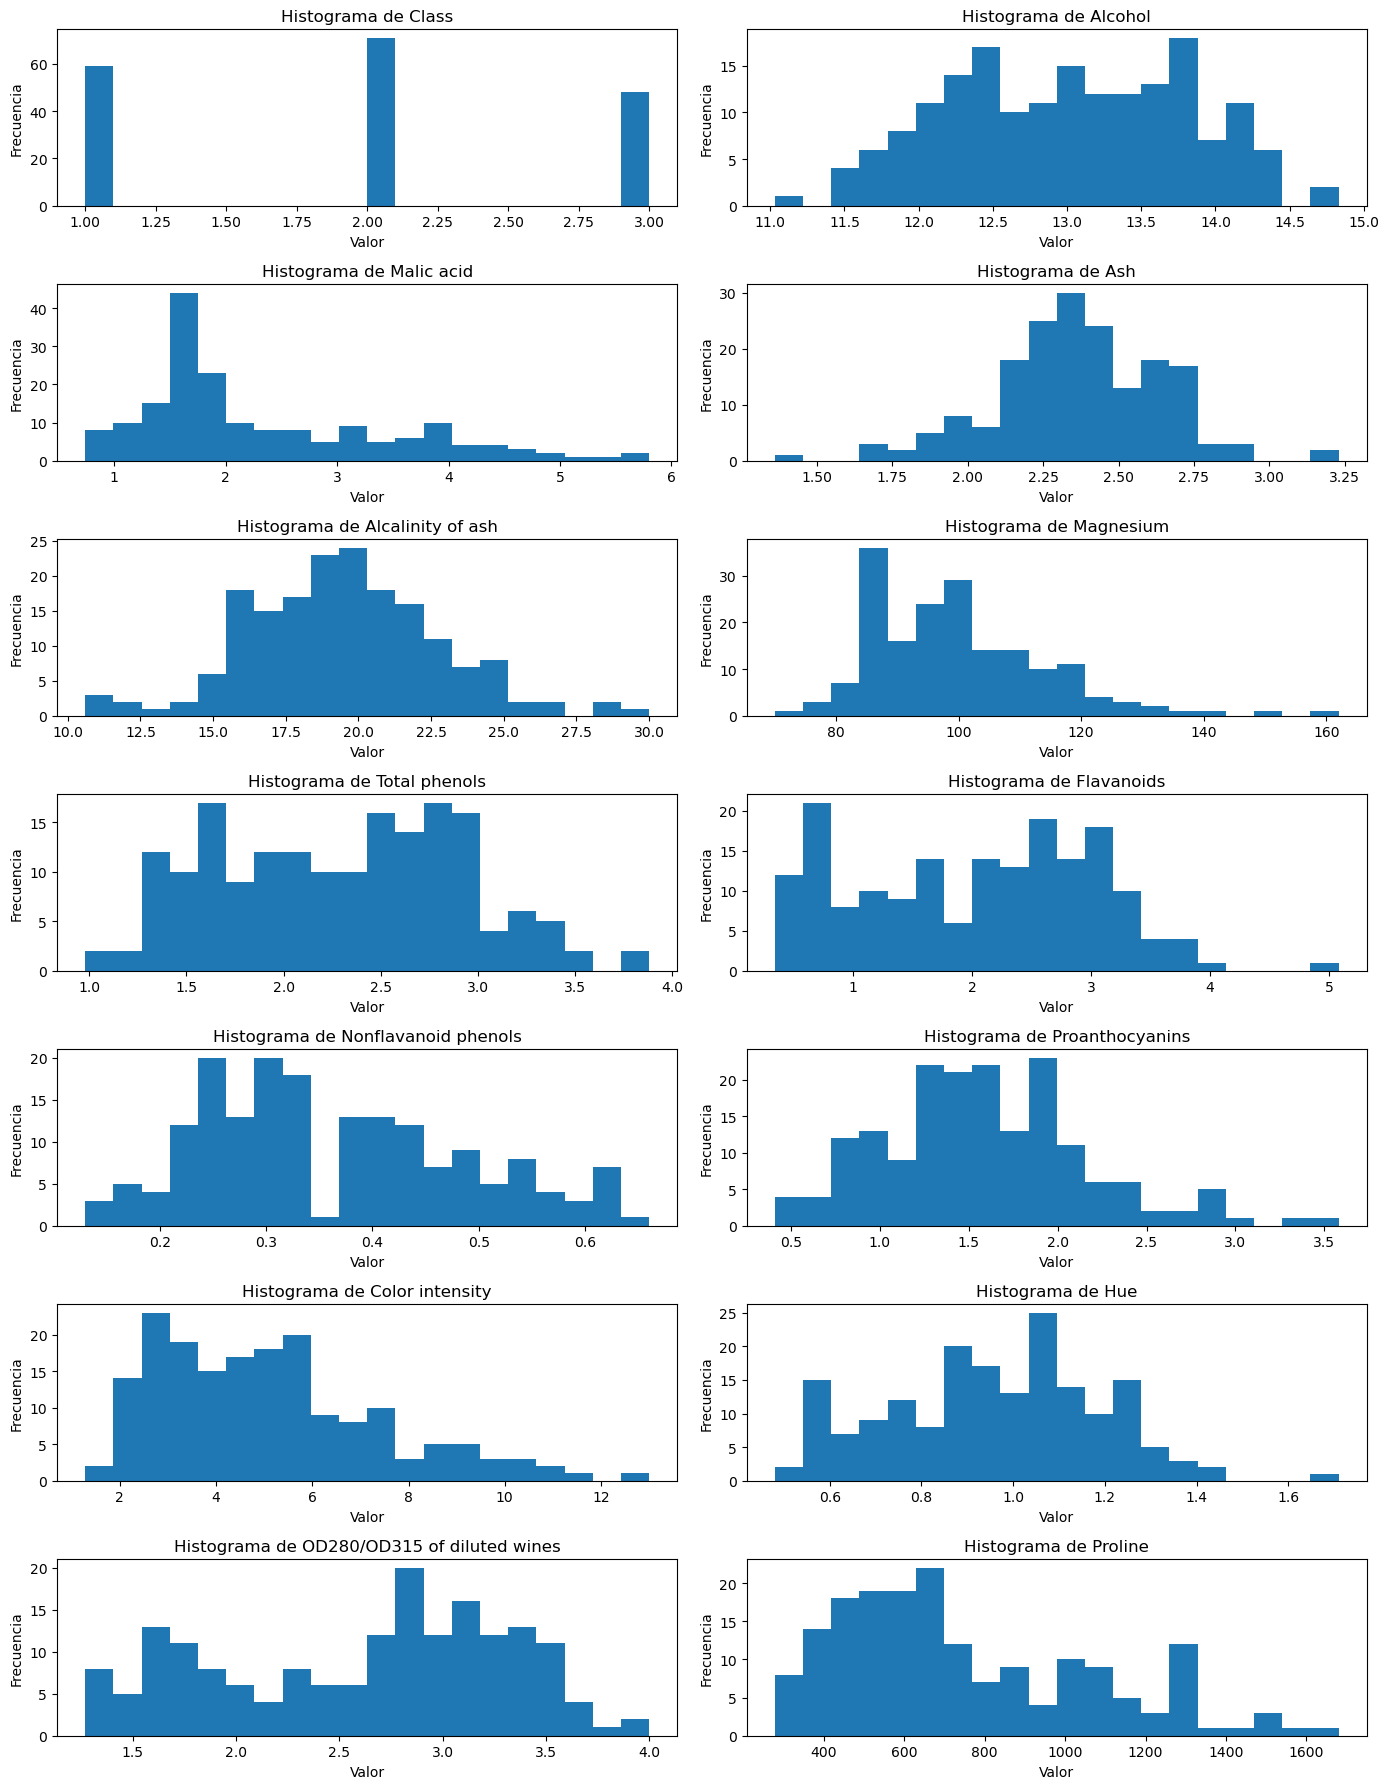

In [24]:
import matplotlib.pyplot as plt

numeric_features = wine_data.select_dtypes(include=['float64', 'int64']).columns

num_rows = len(numeric_features) // 2 + len(numeric_features) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 18))

for idx, feature in enumerate(numeric_features):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    
    ax.hist(wine_data[feature], bins=20)
    ax.set_title('Histograma de ' + feature)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

plt.tight_layout();

La única variable que parece seguir una distribución normal es "Alcalinity of ash"

In [25]:
from scipy.stats import shapiro

numeric_features = wine_data.select_dtypes(include=['float64', 'int64']).columns

for feature in numeric_features:
    stat, p_value = shapiro(wine_data[feature])
    print("Variable:", feature)
    print("Estadística de prueba:", stat)
    print("Valor p:", p_value)
    if p_value > 0.05:
        print("La muestra parece seguir una distribución normal")
    else:
        print("La muestra no parece seguir una distribución normal")
    print()

Variable: Class
Estadística de prueba: 0.8042126297950745
Valor p: 3.5269594726326445e-14
La muestra no parece seguir una distribución normal

Variable: Alcohol
Estadística de prueba: 0.981804609298706
Valor p: 0.020050711929798126
La muestra no parece seguir una distribución normal

Variable: Malic acid
Estadística de prueba: 0.8887843489646912
Valor p: 2.9459384931485033e-10
La muestra no parece seguir una distribución normal

Variable: Ash
Estadística de prueba: 0.9839473962783813
Valor p: 0.03868810459971428
La muestra no parece seguir una distribución normal

Variable: Alcalinity of ash
Estadística de prueba: 0.9902262091636658
Valor p: 0.26393255591392517
La muestra parece seguir una distribución normal

Variable: Magnesium
Estadística de prueba: 0.9383307695388794
Valor p: 6.34515686215309e-07
La muestra no parece seguir una distribución normal

Variable: Total phenols
Estadística de prueba: 0.976681113243103
Valor p: 0.004394507501274347
La muestra no parece seguir una distribu

El test Shapiro-Wilk también indica que la única variable que tiene una distribución normal es Alcalinity of ash.

A continuación un mapa de calor con las correlaciones entre variables.

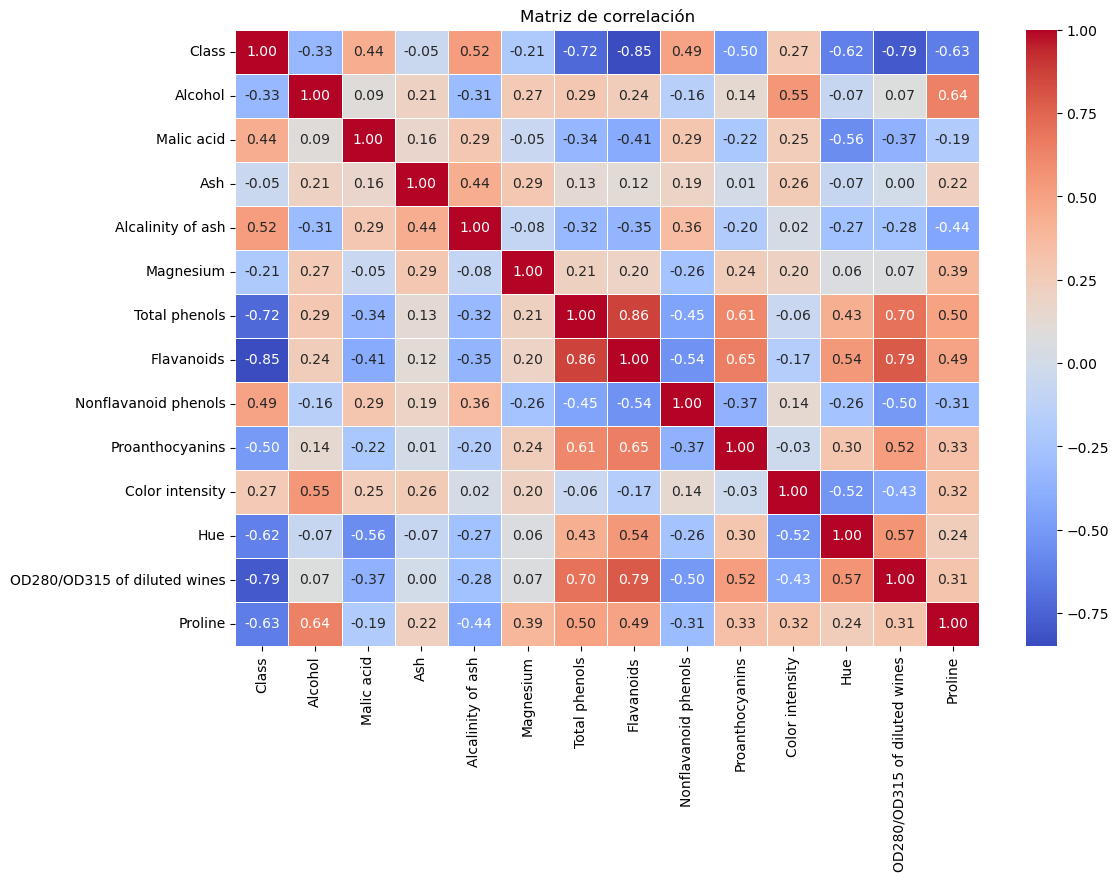

In [26]:
correlation_matrix = wine_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación");

En general se aprecia poca correlación entre las variables. 
Se puede destacar "Flavanoids" que tiene una correlación positiva fuerte con "Total phenols" (0.864564) y "OD280/OD315 of diluted wines" (0.787194). Son compuestos químicos del vino y está relacionado con el total de compuestos de este tipo en el vino (Total phenols) y con el análisis químico que proporciona "OD280/OD315 of diluted wines". 

La mayoría de las correlaciones negativas se encuentran en Class. Las principales son "Flavonoids" con un -0.85 y "OD280/OD315 of diluted wines" (-0.79). Al ser una variable categórica, aunque sea negativa implica un alto impacto en la clasificación final del vino. Es normal teniendo en cuenta que estos compuestos químicos son responsables del sabor, color y aroma del vino.

In [27]:
Q1 = wine_data_x.quantile(0.25)
Q3 = wine_data_x.quantile(0.75)
IQR = Q3 - Q1

outliers = ((wine_data_x < (Q1 - 1.5 * IQR)) | (wine_data_x > (Q3 + 1.5 * IQR))).any(axis=0)

print("Variables con outliers en x_train:")
print(outliers[outliers == True])

Variables con outliers en x_train:
Malic acid           True
Ash                  True
Alcalinity of ash    True
Magnesium            True
Proanthocyanins      True
Color intensity      True
Hue                  True
dtype: bool


Ahora aplico procesos de escalado para las variables con outliers (RobustScaler) y para el resto (MinMaxScaler).

In [28]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

variables_outliers = ['Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']

variables_minmax = [col for col in wine_data_x.columns if col not in variables_outliers]

robust_scaler = RobustScaler()
wine_data_x_robust = robust_scaler.fit_transform(wine_data_x[variables_outliers])
wine_data_x_robust_df = pd.DataFrame(wine_data_x_robust, columns=variables_outliers)

minmax_scaler = MinMaxScaler()
wine_data_x_minmax = minmax_scaler.fit_transform(wine_data_x[variables_minmax])
wine_data_x_minmax_df = pd.DataFrame(wine_data_x_minmax, columns=variables_minmax)

wine_data_x_scaled = pd.concat([wine_data_x_robust_df, wine_data_x_minmax_df], axis=1)

wine_data_x_scaled

,Malic acid,Ash,Alcalinity of ash,Magnesium,Proanthocyanins,Color intensity,Hue,Alcohol,Total phenols,Flavanoids,Nonflavanoid phenols,OD280/OD315 of diluted wines,Proline
0,-0.104730,0.201439,-0.906977,1.526316,1.050000,0.318792,0.222222,0.842105,0.627586,0.573840,0.283019,0.970696,0.561341
1,-0.057432,-0.633094,-1.930233,0.105263,-0.392857,-0.104027,0.251852,0.571053,0.575862,0.510549,0.245283,0.780220,0.550642
2,0.334459,0.892086,-0.209302,0.157895,1.792857,0.332215,0.192593,0.560526,0.627586,0.611814,0.320755,0.695971,0.646933
3,0.057432,0.402878,-0.627907,0.789474,0.892857,1.043624,-0.311111,0.878947,0.989655,0.664557,0.207547,0.798535,0.857347
4,0.489865,1.467626,0.348837,1.052632,0.378571,-0.124161,0.222222,0.581579,0.627586,0.495781,0.490566,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.557432,0.258993,0.232558,-0.157895,-0.707143,1.010067,-0.962963,0.705263,0.241379,0.056962,0.735849,0.172161,0.329529
174,1.381757,0.345324,0.813953,0.210526,-0.207143,0.875839,-0.785185,0.623684,0.282759,0.086498,0.566038,0.106227,0.336662
175,1.631757,-0.287770,0.116279,1.157895,-0.292857,1.848993,-1.111111,0.589474,0.210345,0.073840,0.566038,0.106227,0.397290
176,0.489865,0.028777,0.116279,1.157895,-0.135714,1.546980,-1.081481,0.563158,0.231034,0.071730,0.754717,0.128205,0.400856


In [32]:
wine_data_class_dummies = pd.get_dummies(wine_data_class, prefix = 'Class')

wine_data_combined = pd.concat([wine_data_x_scaled, wine_data_class_dummies], axis=1)

wine_data_combined

,Malic acid,Ash,Alcalinity of ash,Magnesium,Proanthocyanins,Color intensity,Hue,Alcohol,Total phenols,Flavanoids,Nonflavanoid phenols,OD280/OD315 of diluted wines,Proline,Class_1,Class_2,Class_3
0,-0.104730,0.201439,-0.906977,1.526316,1.050000,0.318792,0.222222,0.842105,0.627586,0.573840,0.283019,0.970696,0.561341,1,0,0
1,-0.057432,-0.633094,-1.930233,0.105263,-0.392857,-0.104027,0.251852,0.571053,0.575862,0.510549,0.245283,0.780220,0.550642,1,0,0
2,0.334459,0.892086,-0.209302,0.157895,1.792857,0.332215,0.192593,0.560526,0.627586,0.611814,0.320755,0.695971,0.646933,1,0,0
3,0.057432,0.402878,-0.627907,0.789474,0.892857,1.043624,-0.311111,0.878947,0.989655,0.664557,0.207547,0.798535,0.857347,1,0,0
4,0.489865,1.467626,0.348837,1.052632,0.378571,-0.124161,0.222222,0.581579,0.627586,0.495781,0.490566,0.608059,0.325963,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.557432,0.258993,0.232558,-0.157895,-0.707143,1.010067,-0.962963,0.705263,0.241379,0.056962,0.735849,0.172161,0.329529,0,0,1
174,1.381757,0.345324,0.813953,0.210526,-0.207143,0.875839,-0.785185,0.623684,0.282759,0.086498,0.566038,0.106227,0.336662,0,0,1
175,1.631757,-0.287770,0.116279,1.157895,-0.292857,1.848993,-1.111111,0.589474,0.210345,0.073840,0.566038,0.106227,0.397290,0,0,1
176,0.489865,0.028777,0.116279,1.157895,-0.135714,1.546980,-1.081481,0.563158,0.231034,0.071730,0.754717,0.128205,0.400856,0,0,1


In [34]:
wine_data_combined.describe()

,Malic acid,Ash,Alcalinity of ash,Magnesium,Proanthocyanins,Color intensity,Hue,Alcohol,Total phenols,Flavanoids,Nonflavanoid phenols,OD280/OD315 of diluted wines,Proline,Class_1,Class_2,Class_3
count,1.780000e+02,178.000000,178.000000,178.000000,1.780000e+02,1.780000e+02,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,3.184786e-01,0.018754,-0.001176,0.091662,5.128411e-02,1.235201e-01,-0.022372,0.518584,0.453487,0.356386,0.437460,0.491460,0.334446,0.331461,0.398876,0.269663
std,7.548284e-01,0.789479,0.776643,0.751710,8.176555e-01,7.779483e-01,0.677249,0.213639,0.215811,0.210730,0.234818,0.260070,0.224613,0.472066,0.491049,0.445037
min,-7.601351e-01,-2.877698,-2.069767,-1.473684,-1.635714e+00,-1.144295e+00,-1.437037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.773649e-01,-0.431655,-0.534884,-0.526316,-4.357143e-01,-4.932886e-01,-0.540741,0.350658,0.262931,0.182489,0.264151,0.244505,0.158702,0.000000,0.000000,0.000000
50%,-7.502679e-17,0.000000,0.000000,0.000000,-1.587272e-16,1.491862e-16,0.000000,0.531579,0.474138,0.378692,0.396226,0.553114,0.282097,0.000000,0.000000,0.000000
75%,8.226351e-01,0.568345,0.465116,0.473684,5.642857e-01,5.067114e-01,0.459259,0.696711,0.627586,0.534810,0.580189,0.695971,0.504280,1.000000,1.000000,1.000000
max,2.658784e+00,2.503597,2.441860,3.368421,2.892857e+00,2.788591e+00,2.207407,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Descripción de las características basada en las últimas pruebas:

Class_2 y Class_3: Variables binarias dummy que indican la clase de vino (2 o 3). Se han creado a partir de la variable categórica original "Class" y se ha eliminado esta última.

Alcohol: Variable numérica continua que representa el porcentaje de alcohol en el vino. Tiene una media de aproximadamente 0.52 y una desviación estándar de aproximadamente 0.21.

Malic acid: Variable numérica continua que representa la cantidad de ácido málico en el vino. Tiene una media de aproximadamente 0.32 y una desviación estándar de aproximadamente 0.75.

Ash: Variable numérica continua que representa la cantidad de ceniza en el vino. Tiene una media de aproximadamente 0.45 y una desviación estándar de aproximadamente 0.22.

Alcalinity of ash: Variable numérica continua que representa la alcalinidad de la ceniza en el vino. Tiene una media de aproximadamente -0.02 y una desviación estándar de aproximadamente 0.68.

Magnesium: Variable numérica continua que representa la cantidad de magnesio en el vino. Tiene una media de aproximadamente 0.45 y una desviación estándar de aproximadamente 0.21.

Total phenols: Variable numérica continua que representa la cantidad total de fenoles en el vino. Tiene una media de aproximadamente 0.36 y una desviación estándar de aproximadamente 0.22.

Flavanoids: Variable numérica continua que representa la cantidad de flavonoides en el vino. Tiene una media de aproximadamente 0.44 y una desviación estándar de aproximadamente 0.26.

Nonflavanoid phenols: Variable numérica continua que representa la cantidad de fenoles no flavonoides en el vino. Tiene una media de aproximadamente 0.49 y una desviación estándar de aproximadamente 0.22.

Proanthocyanins: Variable numérica continua que representa la cantidad de proantocianidinas en el vino. Tiene una media de aproximadamente 0.33 y una desviación estándar de aproximadamente 0.49.

Color intensity: Variable numérica continua que representa la intensidad del color del vino. Tiene una media de aproximadamente 0.27 y una desviación estándar de aproximadamente 0.45.

Hue: Variable numérica continua que representa el tono del color del vino. Tiene una media de aproximadamente 0.40 y una desviación estándar de aproximadamente 0.44.

OD280/OD315 of diluted wines: Variable numérica continua que representa la absorbancia del vino a 280/315 nm. Tiene una media de aproximadamente 1.00 y una desviación estándar de aproximadamente 0.45.

Proline: Variable numérica continua que representa la cantidad de prolina en el vino. Tiene una media de aproximadamente 0.27 y una desviación estándar de aproximadamente 0.45.

Ahora vuelvo a realizar la partición train/test sobre el nuevo df.

In [35]:
X = wine_data_combined
y = wine_data_class

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)

Y ahora entrenamos los dos modelos ajustados que mejor resultado han dado antes que son Decision Tree y Support Vector Machine (SVM).

#### Decision Tree

In [36]:
best_tree_model.fit(X_train_final, y_train_final)

y_pred_best_tree_final = best_tree_model.predict(X_test_final)

accuracy = accuracy_score(y_test_final, y_pred_best_tree_final)
precision = precision_score(y_test_final, y_pred_best_tree_final, average = 'macro')
recall = recall_score(y_test_final, y_pred_best_tree_final, average = 'macro')
f1 = f1_score(y_test_final, y_pred_best_tree_final, average = 'macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8888888888888888
Precision: 0.9155354449472096
Recall: 0.8690476190476191
F1-score: 0.8830858508277863


Comparando los datos con el resultado anterior de este mismo modelo, vemos que en general los resultados han empeorado. Solo gana 2 centésimas en Precisión, mientras que en todas las otras métricas el resultado es peor con un margen mayor.

Datos del resultado anterior:

Accuracy: 0.9166666666666666
Precision: 0.9138888888888889
Recall: 0.9107142857142857
F1-score: 0.9115048957002981


#### Support Vector Machine (SVM)

In [37]:
best_svm_model.fit(X_train_final, y_train_final)

y_pred_best_svm_final = best_svm_model.predict(X_test_final)

accuracy = accuracy_score(y_test_final, y_pred_best_svm_final)
precision = precision_score(y_test_final, y_pred_best_svm_final, average = 'macro')
recall = recall_score(y_test_final, y_pred_best_svm_final, average = 'macro')
f1 = f1_score(y_test_final, y_pred_best_svm_final, average = 'macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


SVM obtiene un resultado de 1.0 en todas las métricas que es lo mismo que había obtenido antes. No considero que sean buenos resultados ya que no pueden ser perfectos en todo al 100%. 

En conclusión, obtengo mejores resultados en general antes del procesado de datos que después. Los datos obtenidos en la búsqueda de hiperparámetros han dado unos resultados muy buenos para Random Forest teniendo aproximadamente 0.91 en todas las métricas. También es el que mejores resultados obtiene en la comparación train/test y solo es superado por SVM en los datos obtenidos por la validación cruzada. En esa prueba Decision Tree tiene alrededor del 0.91 de media en todas las métricas que es un resultado muy bueno y una desviación estándar entre 0.54 y 0.71.

En esta prueba SVM obtiene una desviación estándar entre el 0.35 y el 0.37 siendo mejores resultados y más estables en todas las métricas y la media se eleva hasta el 0.96 exacto en todos los resultados.